<a href="https://colab.research.google.com/github/shivammehta007/NLPResearch/blob/master/Tutorials/PyTorch_Tutorial/DeepNNTutorialCoursera/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# One Dimension Tensor

In [2]:
a = torch.Tensor([0, 1, 2, 3, 4])
a[1], a

(tensor(1.), tensor([0., 1., 2., 3., 4.]))

In [3]:
a.dtype

torch.float32

In [5]:
a.type()

'torch.FloatTensor'

In [8]:
a.size(), a.shape, a.ndimension()

(torch.Size([5]), torch.Size([5]), 1)

In [0]:
a_col = a.view(5, 1)

If we don't know the dimensions we can use -1 instead of that

In [18]:
a.view(-1, 1)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [19]:
a_col.ndimension()

2

In [23]:
x = torch.Tensor([0, np.pi, np.pi/2, np.pi/4])
torch.sin(x)

tensor([ 0.0000e+00, -8.7423e-08,  1.0000e+00,  7.0711e-01])

In [28]:
torch.linspace(-5, 5, steps=11)

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [0]:
x = torch.linspace(0, 8*np.pi, 1000)
y = torch.sin(x)

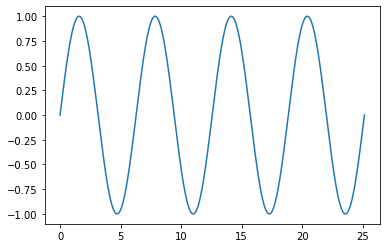

In [35]:
plt.plot(x.numpy(), y.numpy())
plt.show()

# 2 D Tensor

In [39]:
x = torch.rand((5, 2))
x

tensor([[0.4732, 0.8077],
        [0.8364, 0.4012],
        [0.8111, 0.4640],
        [0.9573, 0.1818],
        [0.8853, 0.3871]])

Same as 1 D tensors

# Derivatives in PyTorch

In [0]:
x = torch.tensor(2, requires_grad=True, dtype=torch.float32)
y = x ** 2

$ x^2 \rightarrow \dfrac{dy}{dx} = 2x$

In [44]:
y.backward()
y

tensor(4., grad_fn=<PowBackward0>)

$ 2*x \rightarrow 2 * 2= 4 $

In [46]:
x.grad

tensor(4.)

Another Example

In [0]:
x = torch.tensor(2, requires_grad=True, dtype=torch.float32)

In [49]:
y = x**2 + 2 * x + 1
y

tensor(9., grad_fn=<AddBackward0>)

In [0]:
y.backward()

In [51]:
x.grad

tensor(6.)

# Partial Derivatives

In [0]:
u = torch.tensor(1, requires_grad=True, dtype=torch.float32)
v = torch.tensor(2, requires_grad=True, dtype=torch.float32)
z = u*v + u**2

In [58]:
z.backward()
z

tensor(3., grad_fn=<AddBackward0>)

In [59]:
u.grad

tensor(4.)

In [60]:
v.grad

tensor(1.)

# DataSet

In [0]:
from torch.utils.data import Dataset

In [0]:
class TestDataset(Dataset):

    def __init__(self, length=100, transform=None):
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
    
        self.len = length
        self.transform = transform
    
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len

In [0]:
dataset = TestDataset()

In [76]:
len(dataset)

100

In [77]:
dataset[0]

(tensor([2., 2.]), tensor([1.]))

In [0]:
class AddMult:
    def __init__(self, addx=1, multiy=1):
        self.addx = addx
        self.multiy = multiy
    
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.multiy
        return x, y

In [0]:
am = AddMult()

In [0]:
dataset_ = TestDataset(transform=am)

In [81]:
dataset_[0]

(tensor([3., 3.]), tensor([1.]))